# Regressão e correlação

Renato Naville Watanabe

## Preparação do ambiente

In [39]:
def increase_font(): # importante ao dar aula. aumenta o tamanho da fonte
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '36px'
      break
    }
  }
  '''))
get_ipython().events.register('pre_run_cell', increase_font)

## Correlação e Regressão

As técnicas de correlação e regressão analisam dados amostrais, procurando determinar como duas (ou mais) variáveis estão relacionadas umas com as outras.

Exemplos:

| Variável independente | Variável dependente |
------------------------|----------------------
|Horas de treinamento   | Número de acidentes |
|Altura da pessoa       | Número do sapato    |
|Cigarros por dia       | Capacidade pulmonar |
|Meses do ano           | Volume de vendas    |
|Peso da pessoa         |    QI               |


- **Independente**: Valores manipulados ou selecionados pelo pesquisador (altura, idade, mês). Podem ser ou não a “causa” da variável dependente.

- **Dependente**: Valores observados, contados, ou medidos, que não estejam sob controle direto do pesquisador (velocidade, taxa de câmbio). Podem ser “causadas” ou não pela variável independente.

- **OBS.**: Quando não há relação causal óbvia entre duas ou mais variáveis, qual é independente ‘ ou ‘dependente’ é uma questão de rótulo.

A análise de **correlação** tem como resultado um número que expressa o grau de relacionamento entre duas variáveis.

A análise de **regressão** expressa o resultado em uma equação matemática, descrevendo o relacionamento entre as duas variáveis.

Ambas análises são geralmente utilizadas em pesquisas exploratórias.

## Regressão

### A reta que liga dois pontos

É simples encontrar a reta que liga dois pontos.

A inclinação é:

$$m = \frac{y_2-y_1}{x_2-x_1}$$

e o intercepto é:

$$b = y_1 - mx_1$$

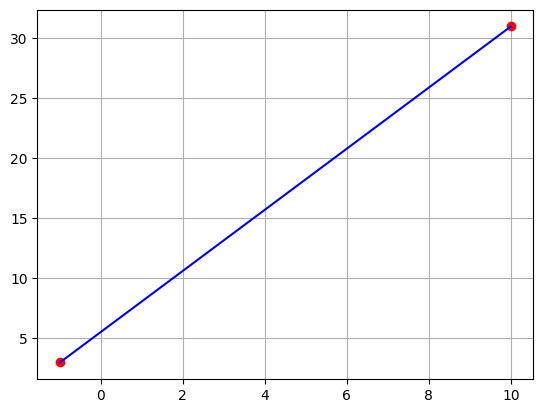

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(-1, 3, marker = 'o', color = 'red')
plt.plot(10, 31, marker = 'o', color = 'red')
x = np.linspace(-1, 10, 50)
m = 28/11
b = 3+m
y = m*x+b
plt.plot(x, y, linestyle = '-', color = 'b')
plt.grid()
plt.show()


### E se tivermos muitos pontos?

Abaixo está o gráfico da grandeza y em função da grandeza x. Esse tipo de gráfico em cada par $x,y$ de dado é mostrado como um ponto (ou qualquer outro tipo marcador) é conhecido como **gráfico de dispersão**.

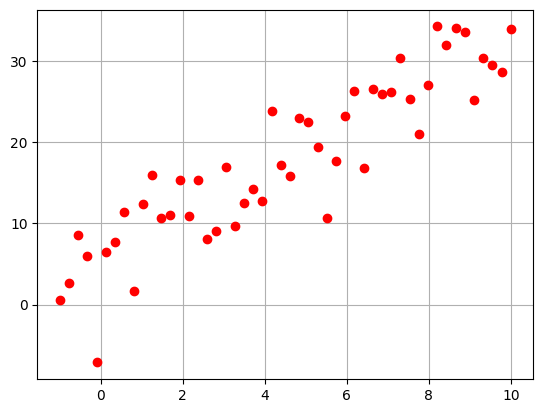

In [3]:
y = m*x+b+5*np.random.randn(len(x))
plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
plt.grid()
plt.show()


### Qual seria a melhor reta que aproxima todos os pontos?

A pergunta pode ser entendida como sendo: qual os melhores valores de $m$ e $b$ para que a reta aproxime todos os pontos? Existem infinitas retas no espaço bidimensional. Então qual delas melhor se ajusta a todos os pontos?

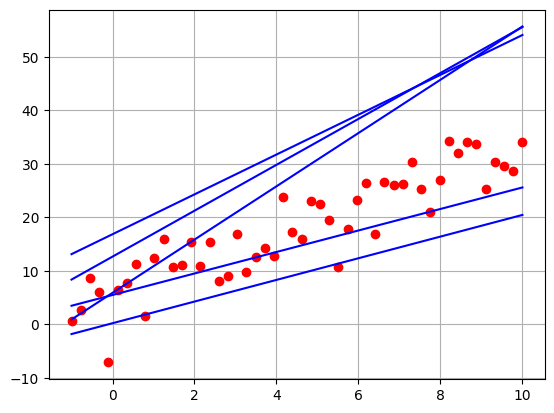

In [4]:

plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
rng = np.random.default_rng()
for i in range(5):
    mr = m + 5*rng.normal(size=1)
    br = b + 5*rng.normal(size=1)
    plt.plot(x, mr*x+br, linestyle = '-', color = 'blue')
plt.grid()
plt.show()

### Primeiro precisamos de um critério para decidir o que seria "a melhor reta"

O critério normalmente escolhido é o erro de cada ponto para a reta estimada elevado ao qudadrado. A melhor reta então é a reta em que a soma dos desvios (na figura indicado pelas retas pretas) ao quadrado é a menor possível. Por este motivo, o método para encontrar a reta de regressão também é conhecido como **método dos mínimos quadrados**

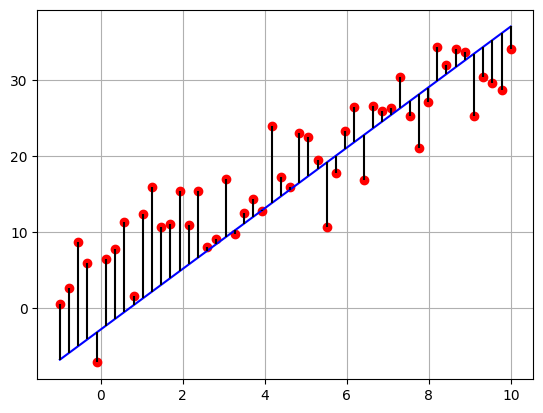

In [13]:
plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
mr = m + 5*rng.normal(size=1)
br = b + 5*rng.normal(size=1)
plt.plot(x, mr*x+br, linestyle = '-', color = 'blue')
plt.vlines(x, y, mr*x+br,
             linestyle='-', color='black')
plt.grid()
plt.show()

### Regressão linear

A reta encontrada seguindo o critério dos mínimos quadrados (ou seja, a reta que resulta no menor erro quadrático possível) é conhecida como reta de regressão linear. Os valores de $m$ e $b$, de acordo com esse critério, são (a demonstração dessas expresões estão muito além do escopo desta disciplina):

$$m = \frac{\displaystyle\sum_{i=0}^{n-1}(x[i]-\bar{x})(y[i]-\bar{y})}{\displaystyle\sum_{i=0}^{n-1}(x[i]-\bar{x})^2} $$

$$b = \bar{y} - m\bar{x} $$

$$y = mx + b $$

In [15]:
mediaX = np.mean(x)
mediaY = np.mean(y)
desvioX = x - mediaX
desvioY = y - mediaY
m = np.sum(desvioX*desvioY)/np.sum(desvioX**2)
b = mediaY - m*mediaX
print(f'm={m:.2f} e b={b:.2f}')

m=2.77 e b=5.44


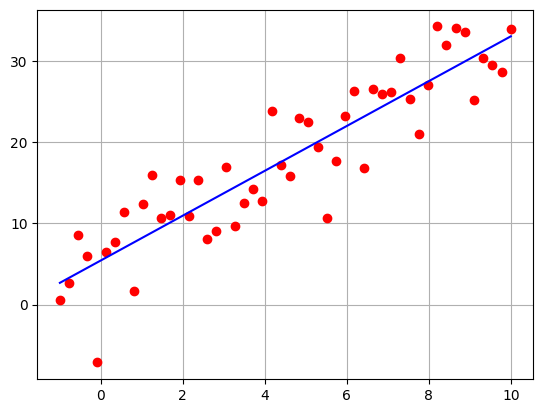

In [16]:
plt.figure()
plt.plot(x , y, marker='o', color='red', linestyle='')
plt.plot(x, m*x+b, linestyle = '-', color = 'blue')
plt.grid()
plt.show()

O Numpy tem uma função pronta para fazer a regressão. É a função polyfit. Basta fornecer o vetor com a variável independente, o vetor com a variável dependente e a opção deg=1.


In [18]:
m, b = np.polyfit(x, y, deg=1)
print(f'm={m:.2f} e b={b:.2f}')

m=2.77 e b=5.44


Abaixo é aberto o arquivo com informações de sujeitos que participaram de um experimento de postura.

In [19]:
import pandas as pd
info_postura = pd.read_csv('https://raw.githubusercontent.com/rnwatanabe/BasesComputacionais2021/main/dados/BDSinfo.csv', sep='\t')
info_postura

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,...,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date
0,BDS00001,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
1,BDS00002,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
2,BDS00003,1,Open,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
3,BDS00004,1,Closed,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
4,BDS00005,1,Closed,Firm,33.000000,Young,F,157.5,54.2,21.849332,...,2,2,2,2,2,2,2,1,25,2015-10-08 08:30:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,BDS01952,163,Open,Firm,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1926,BDS01953,163,Open,Firm,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1927,BDS01954,163,Closed,Foam,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538
1928,BDS01955,163,Closed,Foam,25.416667,Young,M,172.0,74.6,25.216333,...,2,2,2,2,2,2,2,2,26,2016-03-11 10:49:57.538


Abaixo os coeficientes da reta de regressão entre são calculados.

In [20]:
m, b = np.polyfit(info_postura['Age'], info_postura['Height'], deg=1)
print(m)
print(b)

-0.22865345098174886
173.278206974553


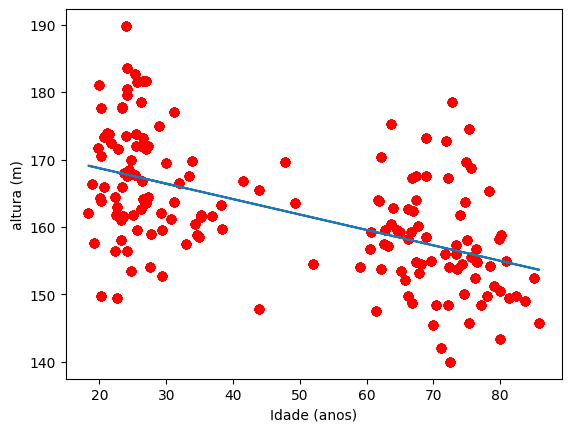

In [21]:
plt.figure()
plt.plot(info_postura['Age'], info_postura['Height'],
         marker='o', color='red', linestyle='')
plt.plot(info_postura['Age'], m*info_postura['Age'] + b)
plt.xlabel('Idade (anos)')
plt.ylabel('altura (m)')
plt.show()


#### Uso da regressão para estimar valores

A reta encontrada pode ser usada para, por exemplo, estimar o tamanho de uma pessoa dada a sua idade. Por exemplo, se a pessoa tiver 50 anos, a estimativa é que a altura da pessoa  seja:

In [23]:
y = m*50+b
print('%.2f cm' %y)

161.85 cm


Ou seja, o uso da regressão possibilita que generalizemos os dados. É claro que é necessário cuidado. Nem sempre o uso de uma relação linear é válida. É necessário que exista uma correlação entre as duas variáveis.

### Regressão polinomial

É possível ajustar os dados a polinômios com graus maiores do que um (reta) usando a função polyfit.

Por exemplo, no dado abaixo, até uma certa idade (aproximadamente 40 anos) os anos de estudo aumentam com a idade. Para idades maiores, os anos de estudo caem com a idade.

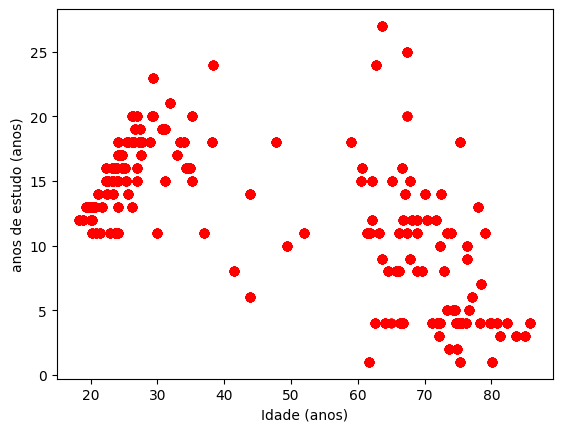

In [25]:
plt.figure()
plt.plot(info_postura['Age'], info_postura['Ystudy'],
         marker='o', color='red', linestyle='')
plt.xlabel('Idade (anos)')
plt.ylabel('anos de estudo (anos)')
plt.show()

Nesse caso, ajustar uma reta, embora possível, não faria sentido. Nesse caso podemos ajustar uma parábola (grau 2) para tentar pegar esse comportamento de subida e descida (uma reta só sobe ou só desce). Isso é feito com a opção deg=2 (para polinômios de grau maior é só mudar o número).

Para facilitar, podemos achar o valor de um polinômio com a função polyval. Se formos usar a função polyval, na hora de usar o polyfit podemos gravar tudo em uma variável só.

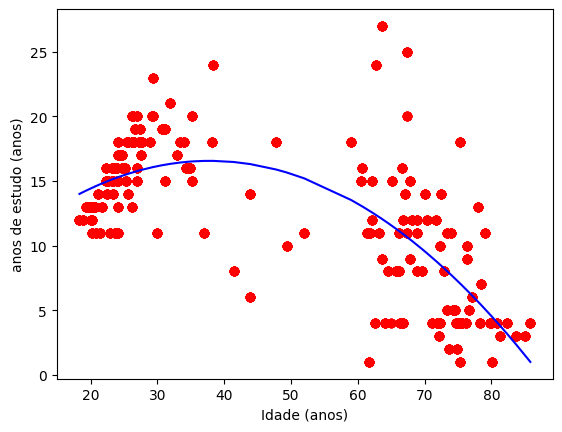

In [28]:
p = np.polyfit(info_postura['Age'], info_postura['Ystudy'],
                     deg=2)

parabola_estimada = np.polyval(p, info_postura['Age'].sort_values())
plt.figure()
plt.plot(info_postura['Age'], info_postura['Ystudy'],
         marker='o', color='red', linestyle='')
plt.plot(info_postura['Age'].sort_values(),
         parabola_estimada,
         marker='', color='blue', linestyle='-')
plt.xlabel('Idade (anos)')
plt.ylabel('anos de estudo (anos)')
plt.show()

## Correlação

A análise gráfica do comportamento entre as variáveis idade e altura mostra a existência de **correlação negativa**, pois à medida que a idade cresce, a altura decresce. O gráfico mostra que a altura esperada de uma pessoa é menor quanto maior a idade.

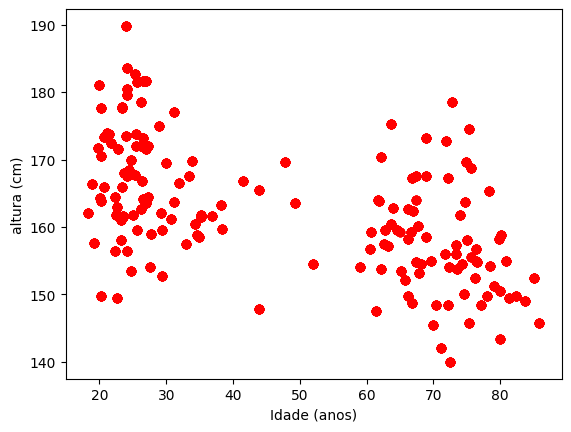

In [30]:
plt.figure()
plt.plot(info_postura['Age'], info_postura['Height'],
         marker='o', color='red', linestyle='')
plt.xlabel('Idade (anos)')
plt.ylabel('altura (cm)')
plt.show()

A análise gráfica do comportamento entre as variáveis tamanho do pé e altura mostra a existência de **correlação  positiva**, pois à medida que o tamanho do pé cresce, a altura também cresce.

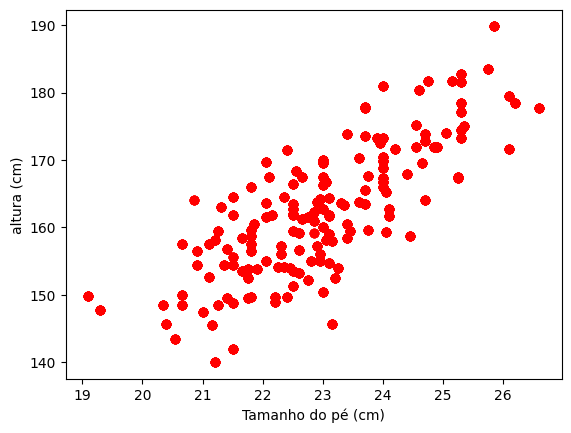

In [31]:
plt.figure()
plt.plot(info_postura['FootLen'], info_postura['Height'],
         marker='o', color='red', linestyle='')
plt.xlabel('Tamanho do pé (cm)')
plt.ylabel('altura (cm)')
plt.show()

No gráfico abaixo, não há correlação linear entre idade e peso. O gráfico não mostra nenhuma relação entre a idade e o peso de uma pessoa.


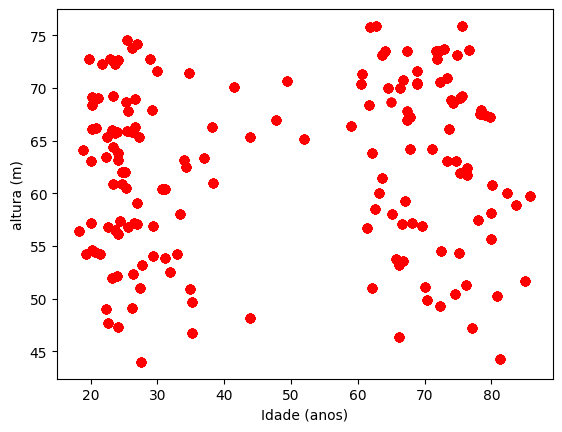

In [32]:
plt.figure()
plt.plot(info_postura['Age'], info_postura['Weight'],
         marker='o', color='red', linestyle='')
plt.xlabel('Idade (anos)')
plt.ylabel('altura (m)')
plt.show()

### Correlação linear

Utilizar apenas um gráfico  para interpretar a existência de uma correlação pode ser uma tarefa bastante subjetiva.

Como medida mais objetiva, utiliza-se o coeficiente de correlação para medir o grau e o tipo de uma correlação linear entre duas variáveis.

$$r = \frac{\displaystyle\sum_{i=0}^{n-1}(x[i]-\bar{x})(y[i]-\bar{y})}{\sqrt{\displaystyle\sum_{i=0}^{n-1}(x[i]-\bar{x})^2}\sqrt{\displaystyle\sum_{i=0}^{n-1}(y[i]-\bar{y})^2}} $$

O Pandas tem uma função para calcular a correlação entre duas colunas. Para usar a função é primeira_coluna.corr(segunda_coluna). Por exemplo, para calcular a correlação entre idade da pessoa e sua altura.

In [38]:
corr_idade_altura = info_postura['Age'].corr(info_postura['Height'])
corr_idade_altura

-0.5425089231963477

Como esperado, é um número negativo, já que graficamente observamos que a correlação é negativa.

O intervalo de variação do coeficiente de correlação $r$ está ente -1 à
1.

![corrcoef](https://github.com/BMClab/BasesComputacionais/blob/master/aula10/imagens/corr2.png?raw=1)

### Coeficiente de correlação

![corr](https://github.com/BMClab/BasesComputacionais/blob/master/aula10/imagens/corr3.png?raw=1)

### Correlação e causalidade

**Correlação não implica em causalidade**.

O número de pessoas usando óculos-de-sol e a quantidade de sorvete consumido em um particular dia são altamente correlacionados.

Isto não significa que usar óculos-de-sol causa a compra de sorvetes ou vice-versa!

É extremamente difícil estabelecer relações causais a partir de dados observacionais. Precisamos realizar experimentos para obter mais evidências de uma relação causal.

Veja [nesse site dados curiosos que apresentam correlação e com certeza não tem relação de causalidade!](https://www.tylervigen.com/spurious-correlations).

![cegonha](https://github.com/BMClab/BasesComputacionais/blob/master/aula10/imagens/cegonha.png?raw=1)

## Coeficiente de determinação

É possível avaliar a qualidade de uma regressão usando o o coeficiente de determinação, represntado nomalmente por $R²$.

No caso de uma regressão linear, o coeficiente de determinação é o quadrado da correlação.

Por exemplo, no caso da regressão entre a idade e a altura, o coeficiente de determinação é:

In [ ]:
info_postura['Age'].corr(info_postura['Height'])**2

0.29431593174766046

Normalmente, a interpretação desse número é qual a porcentagem da variável dependente  que é explicada pela regressão. Nesse caso, em torno de 29 % dos dados é explicada pela regressão linear.

## Cuidados ao interpretar a regressão e correlação

Devemos ter cuidado ao interpretar os resultados de um ajuste de curva para determinar se o modelo ajustado captura verdadeiramente a relação entre a variável independente (preditor) e a variável dependente (resposta).

Um exemplo ilustrativo para demonstrar que o resultado de um ajuste de curva não é necessariamente um indicador do fenômeno que está sendo modelado são os dados do quarteto de Anscombe. Esses quatro conjuntos de dados têm propriedades estatísticas básicas e parâmetros de ajuste linear muito semelhantes, mas são muito diferentes quando visualizados.

In [40]:
# Dados do quarteto de Anscombe
x =  np.array([[10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5],
               [8,  8,  8, 8,  8,  8, 8, 19, 8, 8, 8]])
y = np.array([[8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
              [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74],
              [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
              [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]])


<IPython.core.display.Javascript object>

### Estatísticas descritivas básicas

Os dados do quarteto de Anscombe têm as mesmas estatísticas descritivas básicas.


In [41]:
print('Mean of x    :', np.mean(y, axis=1))
print('Variance of x:', np.var(y, axis=1))
print('Mean of y    :', np.mean(y, axis=1))
print('Variance of y:', np.var(y, axis=1))

<IPython.core.display.Javascript object>

Mean of x    : [7.50090909 7.50090909 7.5        7.50090909]
Variance of x: [3.75206281 3.75239008 3.74783636 3.74840826]
Mean of y    : [7.50090909 7.50090909 7.5        7.50090909]
Variance of y: [3.75206281 3.75239008 3.74783636 3.74840826]


In [42]:
df = pd.DataFrame(np.vstack((x, y)).T, columns=['X1', 'X2', 'X3', 'X4', 'Y1', 'Y2', 'Y3', 'Y4'])
df.describe()

<IPython.core.display.Javascript object>

,X1,X2,X3,X4,Y1,Y2,Y3,Y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


<IPython.core.display.Javascript object>

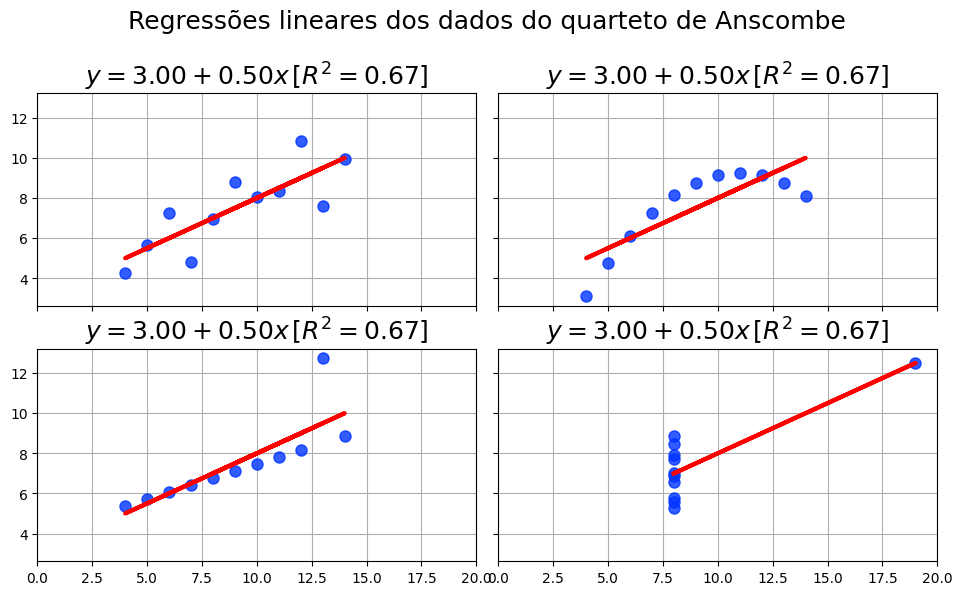

In [47]:
# function for the linear fit to automate the process
def linearfit(x, y):
    p = np.polyfit(x, y, deg=1)  # coefficients and covariance matrix
    yfit = np.polyval(p, x)          # evaluate the polynomial at x
    R2 = np.corrcoef(x, y)[0, 1]**2  # coefficient of determination between x and y
    resid = y - yfit

    return yfit, p, R2, resid


fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axs = ax.flatten()
resid = np.empty_like(y)
for i, ax in enumerate(axs):
    yf, p, R2, resid[i, :] = linearfit(x[i, :], y[i, :])
    ax.plot(x[i, :], y[i, :], color=[0, .2, 1, .8], marker='o', linestyle='', markersize=8)
    ax.plot(x[i, :], yf, 'r', linewidth=3)
    ax.set_title('$y = %.2f + %.2f x \, [R^2=%.2f]$' %(p[1], p[0], R2), fontsize=18)
    ax.grid()

ax.set_xlim(0, 20)
fig.subplots_adjust(bottom=0.1, left=.05, right=.95, hspace=.2, wspace=.05)
plt.suptitle("Regressões lineares dos dados do quarteto de Anscombe",
             fontsize=18, y=1.02)
plt.show()

## Exercícios

- Escrever um notebook do Colab para fazer o que pedido a seguir.

- O arquivo com as funções que calcula a regressão e a correlação devem ser importados no script. Se quiser, pode usar o arquivo [funcoesCompleta.py](funcoes/funcoesCompleta.py) com as duas funções.



**1)** Faça o gráfico da Renda [dos jogos do campeonato brasileiro de 2018](../dados/tabelaBrasileirao2018.csv) em função do público de cada jogo. Calcule a correlação entre essas grandezas.



**2**) Para essa tarefa você deverá usar o [arquivo com vários dados pessoais de sujeitos que participaram de um experimento](../dados/BDSinfo.csv).

Faça o gráfico de dispersão do tamanho do pé (FootLen) em função da altura da pessoa (Height). Calcule (e mostre na tela) a correlação e plote a reta de regressão entre esses dados.

Dica: esse arquivo separa as suas colunas com uma tabulação. Para ler o arquivo a opção 'sep' deve ser '\t'.

 **3)** Para essa tarefa você deverá usar os arquivos com a [inflação anual](../dados/inflaAnual.csv) e com o [crescimento do PIB anual](../dados/pibAnual.csv).

Faça o gráfico de dispersão entre o crescimento do PIB e a inflação anual de 1961 a 2018. Calcule e mostre na tela a correlação entre as duas grandezas.

**4)**  Para essa tarefa você deverá usar o [arquivo com vários dados pessoais de sujeitos que participaram de um experimento](../dados/BDSinfo.csv).

Faça o gráfico de dispersão do número de medicamentos que a pessoa toma (Nmedication) em função da idade da pessoa (Age). Calcule (e mostre na tela) a correlação e plote a reta de regressão entre esses dados.

Dica: esse arquivo separa as suas colunas com uma tabulação. Para ler o arquivo a opção 'sep' deve ser '\t'.

## Referências

- Chalco, JM, *Slides de Bases Computacionais da Ciência*, (2014)
- Leite, S, *Slides de Bases Computacionais da Ciência*, (2018)
- [Marietto, MGB et al.; **Bases computacionais da Ciência** (2013)](http://prograd.ufabc.edu.br/images/pdf/bases_computacionais_livro.pdf).
- [Wikipedia](www.wikipedia.com.br)
- [Balance](https://github.com/BMClab/datasets/tree/master/BDS)
- [Pearl, J., Mackenzie, D., The book of why (2018)](https://www.amazon.com.br/Book-Why-Science-Effect-English-ebook/dp/B075DCKP7V/ref=tmm_kin_swatch_0?_encoding=UTF8&qid=&sr=)
